# ObsID : 0945060134, SRCNUM : 1, Instru : EPN

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

import stingray as st
from stingray import Lightcurve, AveragedPowerspectrum
from stingray.gti import create_gti_mask

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [10,5]

In [4]:
def lightcurve(file):
    hdul = fits.open(file)
    print()
    print(color.BOLD +file+ color.END)
    hdul.info()
    
    rate_data = hdul[1].columns
    print()
    print(rate_data)
        
    time = hdul[1].data.field('TIME')
    rate = hdul[1].data.field('RATE')
    error = hdul[1].data.field('ERROR')
    backrate = hdul[1].data.field('BACKV')
    
    """
    print()
    print(f"TIME = {time} s")
    print(f"RATE = {rate} count/s")
    print(f"ERROR = {error} count/s")
    """
    
    lcs = []
    backlcs = []
    gtis = []
    for i in hdul[2].data:
        gtis.append([i[0],i[1]])
    lcs.append(Lightcurve(time, rate, error, gti=gtis, input_counts=False))
    backlcs.append(Lightcurve(time, backrate, error, gti=gtis, input_counts=False))
    
    for i in range(len(lcs)):
        plt.xlabel('Time (s)')
        plt.ylabel('Countrate (/s)')
        plt.plot(lcs[i].time, lcs[i].countrate, color='steelblue', lw=1, ds='steps-mid', label='Source')
        plt.plot(backlcs[i].time, backlcs[i].countrate, color='firebrick',lw=1, ls='--', ds='steps-mid', label='Background')
        plt.title(f'ObsID : 0945060134, SRCNUM : 1, Instru : EPN')
        plt.legend(loc='upper right')
        plt.grid()
        for j in range(len(lcs[i].gti)-1):
            plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='purple',alpha=0.25)
        plt.show()

In [24]:
def lc_rebin(file, dt_rebin):
    hdul = fits.open(file)

    time = hdul[1].data.field('TIME')
    rate = hdul[1].data.field('RATE')
    error = hdul[1].data.field('ERROR')
    backrate = hdul[1].data.field('BACKV')

    lcs = []
    gtis = []
    for i in hdul[2].data:
        gtis.append([i[0],i[1]])
    lc = Lightcurve(time, rate, error, gti=gtis, input_counts=False)
    lcs.append(lc.rebin(dt_rebin))
    #lcs.append(Lightcurve(time, rate, error, gti=gtis, input_counts=False))
    
    for i in range(len(lcs)):
        plt.xlabel('Time (s)')
        plt.ylabel('Countrate (/s)')
        plt.plot(lcs[i].time, lcs[i].countrate, color='steelblue', lw=1, ds='steps-mid', label='Source')
        plt.title(f'Time bin size = {dt_rebin}s')
        plt.legend(loc='upper right')
        plt.grid()
        for j in range(len(lcs[i].gti)-1):
            plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='purple',alpha=0.25)
        plt.show()


P0945060134PNX000SRCTSR8001.FTZ
Filename: P0945060134PNX000SRCTSR8001.FTZ
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      67   ()      
  1  RATE          1 BinTableHDU    168   5992R x 28C   [D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 4A, D]   
  2  SRC_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  4  REGION_SRC    1 BinTableHDU     23   1R x 4C   [16A, E, E, E]   
  5  REGION_BKG    1 BinTableHDU     23   3R x 4C   [16A, E, E, E]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count s-1'
    name = 'ERROR'; format = 'E'; unit = 'count s-1'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count s-1'
    name = 'BACKE'; format = 'E'; unit = 'count s-1'
    name = 'RATE1'; format = 'E'; unit = 'count s-1'
    name = 'RATE1_ERR'; format 

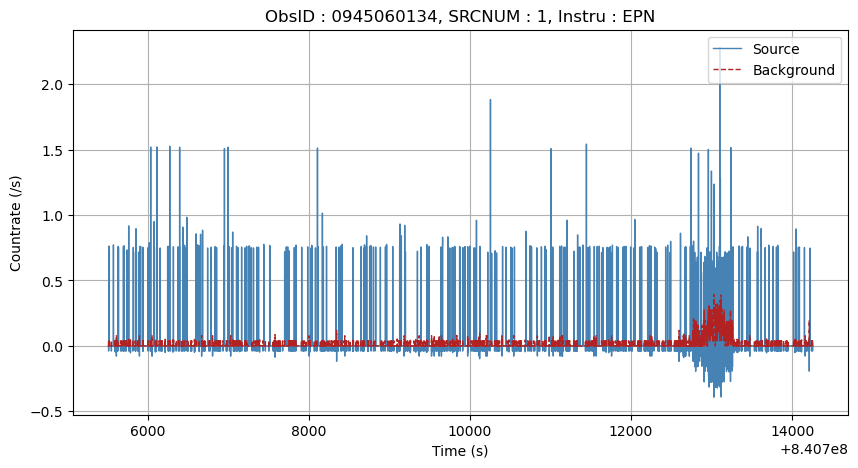

In [26]:
lc_fname = "P0945060134PNX000SRCTSR8001.FTZ"
lightcurve(lc_fname)

## Time bin size = 10s

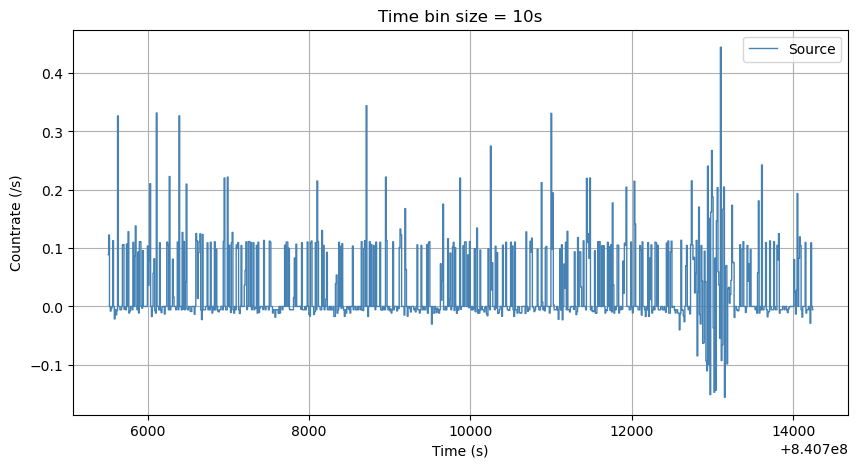

In [13]:
lc_rebin(lc_fname, 10)

## Time bin size = 50s

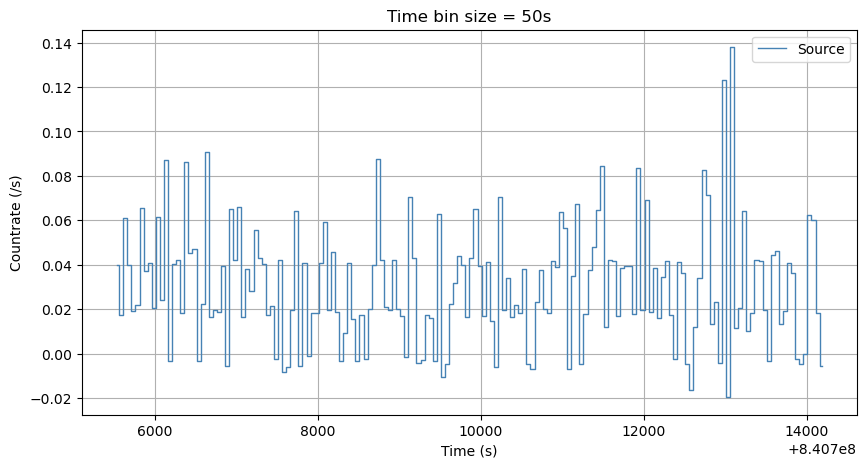

In [15]:
lc_rebin(lc_fname, 50)

## Time bin size = 200s

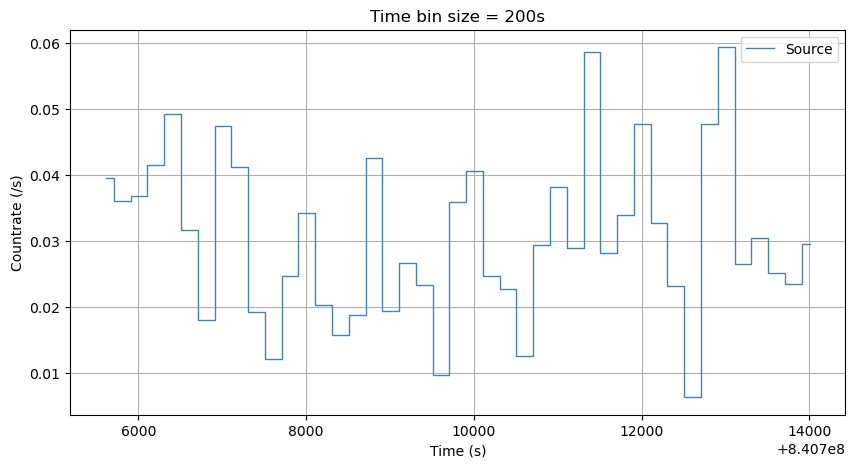

In [17]:
lc_rebin(lc_fname, 200)

## Time bin size = 500s

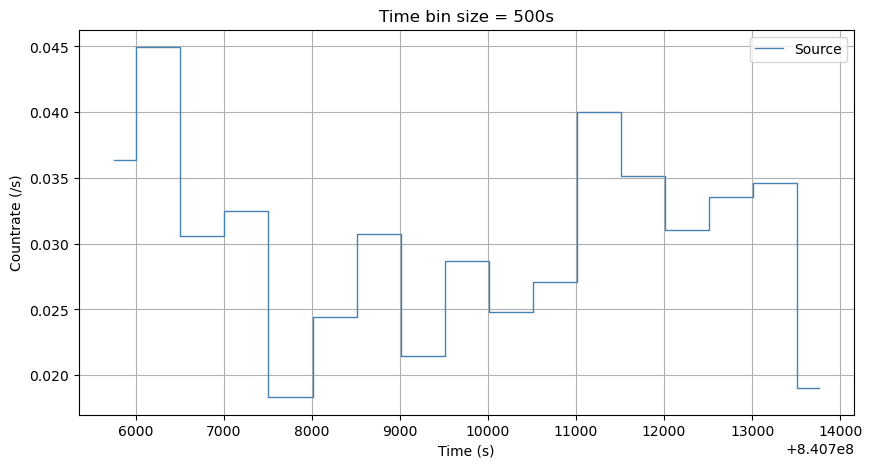

In [19]:
lc_rebin(lc_fname, 500)